In [2]:
!wget https://ivan-sipiran.com/downloads/Imagenes.zip
!unzip Imagenes.zip

--2025-09-03 17:35:38--  https://ivan-sipiran.com/downloads/Imagenes.zip
Resolving ivan-sipiran.com (ivan-sipiran.com)... 66.96.149.31
Connecting to ivan-sipiran.com (ivan-sipiran.com)|66.96.149.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30654084 (29M) [application/zip]
Saving to: ‘Imagenes.zip’

Imagenes.zip        100%[===================>]  29.23M  16.4MB/s    in 1.8s    

2025-09-03 17:35:40 (16.4 MB/s) - ‘Imagenes.zip’ saved [30654084/30654084]

Archive:  Imagenes.zip
   creating: Imagenes/
  inflating: Imagenes/20191123_093200.jpg  
  inflating: Imagenes/Aviones.jpg    
  inflating: Imagenes/bird.png       
  inflating: Imagenes/cameraman.tif  
  inflating: Imagenes/centro1.jpg    
  inflating: Imagenes/centro2.png    
  inflating: Imagenes/claro.png      
  inflating: Imagenes/contrast1.jpg  
  inflating: Imagenes/contrast2.jpeg  
  inflating: Imagenes/contrast3.jpg  
  inflating: Imagenes/diagonalbars.png  
  inflating: Imagenes/digits.png     

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

input_image = cv2.imread('Imagenes/plaza.jpg')
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
harris_test = input_image.copy()

gray = cv2.cvtColor(harris_test, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

blocksize = 4
kernel_size = 3
dst = cv2.cornerHarris(gray, blocksize, kernel_size, 0.05)

dst = cv2.dilate(dst,None)
harris_test[dst>0.01*dst.max()] = [0,0,255]

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(harris_test)
plt.subplot(1,2,2), plt.imshow(dst, cmap='gray')
plt.show()

#sift = cv2.xfeatures2d.SIFT_create()

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Number features: 4397


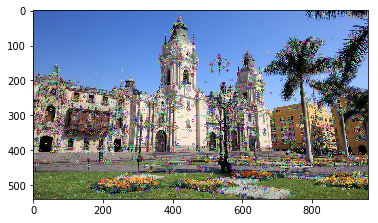

In [ ]:
orbimg = input_image.copy()

orb = cv2.xfeatures2d.SIFT_create()

kp = orb.detect(orbimg, None)
kp, des = orb.compute(orbimg, kp)

print('Number features:', len(kp))

cv2.drawKeypoints(orbimg, kp, orbimg)
plt.imshow(orbimg)
plt.show()

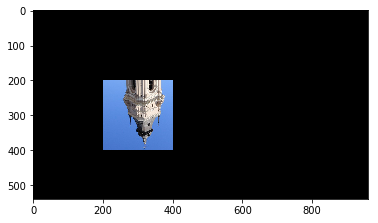

In [ ]:
img2match = np.zeros(input_image.shape, np.uint8)

roi = input_image[0:200, 300:500]
img2match[0:200,300:500] = [0,0,0]
roi = cv2.flip(roi, 0)
img2match[200:200+roi.shape[0], 200:200+roi.shape[1]] = roi
plt.imshow(img2match)
plt.show()

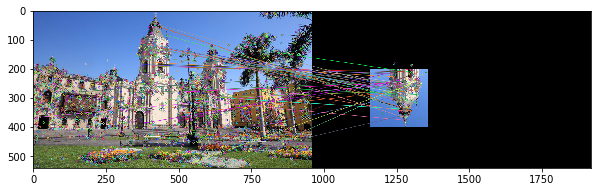

In [ ]:
kp2 = orb.detect(img2match, None)
kp2, des2 = orb.compute(img2match, kp2)
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des, des2)

matches = sorted(matches, key = lambda x:x.distance)
oimg = cv2.drawMatches(orbimg, kp, img2match, kp2, matches[:50], orbimg)
plt.figure(figsize=(10,10))
plt.imshow(oimg)
plt.show()